In [1]:
from google.colab import drive
drive.mount('/content/drive')
#importing dataset


Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/behaviour_simulation_train.xlsx - Sheet1.csv')
df.shape
df.head()
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17331 entries, 0 to 17330
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                17331 non-null  int64 
 1   date              17331 non-null  object
 2   likes             17331 non-null  int64 
 3   content           17331 non-null  object
 4   username          17331 non-null  object
 5   media             17331 non-null  object
 6   inferred company  17331 non-null  object
dtypes: int64(2), object(5)
memory usage: 947.9+ KB


,0
id,0
date,0
likes,0
content,0
username,0
media,0
inferred company,0


In [15]:
df = df.dropna(subset=['content', 'username', 'inferred company', 'likes'])
df['media'] = df['media'].fillna('no_media')
df['has_media'] = df['media'].apply(lambda x: x != 'no_media')
df['content'] = df['content'].astype(str).str.strip().str.lower()
df['datetime'] = pd.to_datetime(df['date'], errors='coerce')

#pre-processing

In [7]:
df.head()
df.info()
df.isnull().sum()

#verifying


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17331 entries, 0 to 17330
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                17331 non-null  int64         
 1   date              17331 non-null  object        
 2   likes             17331 non-null  int64         
 3   content           17331 non-null  object        
 4   username          17331 non-null  object        
 5   media             17331 non-null  object        
 6   inferred company  17331 non-null  object        
 7   has_media         17331 non-null  bool          
 8   datetime          17331 non-null  datetime64[ns]
dtypes: bool(1), datetime64[ns](1), int64(2), object(5)
memory usage: 1.1+ MB


,0
id,0
date,0
likes,0
content,0
username,0
media,0
inferred company,0
has_media,0
datetime,0


<Axes: xlabel='likes', ylabel='Count'>

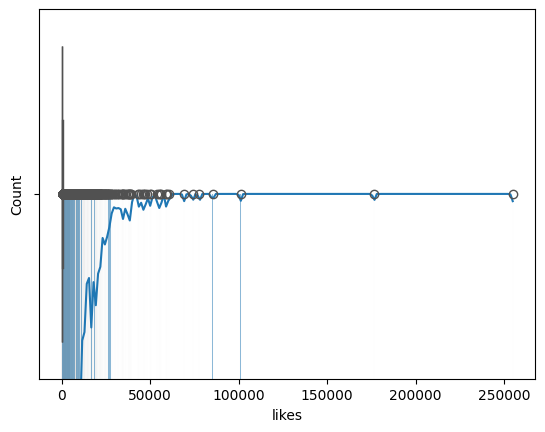

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['likes'], kde=True)
sns.boxplot(x=df['likes'])

#EDA plot
#The distribution of tweet likes is highly right-skewed — most tweets receive relatively few likes, while a small number of tweets get tens or even hundreds of thousands of likes.

Text(0, 0.5, 'Tweet Count')

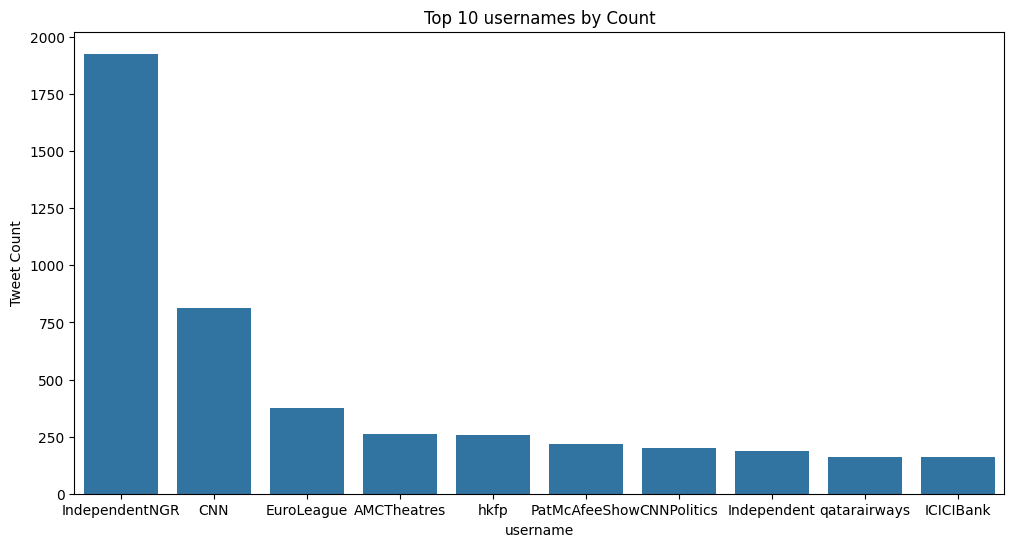

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))  # Widen the plot
sns.countplot(x='username', data=df, order=df['username'].value_counts().iloc[:10].index)
plt.title("Top 10 usernames by Count")
plt.xlabel("username")
plt.ylabel("Tweet Count")
#This bar plot shows the 10 most frequent usernames in the dataset. These usernames are the most active on Twitter and may drive overall engagement trends.


Text(0, 0.5, 'Tweet Count')

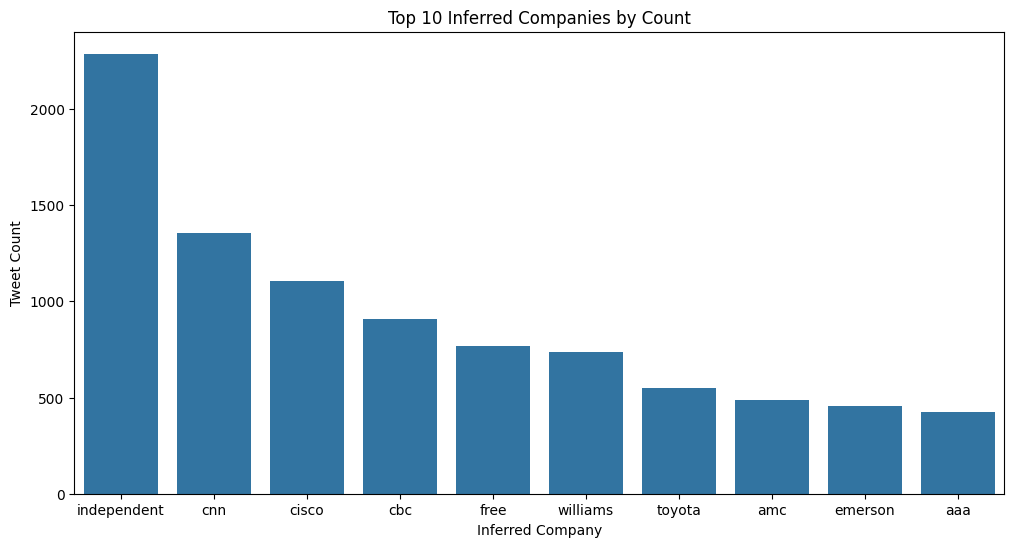

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))  # Widen the plot
sns.countplot(x='inferred company', data=df, order=df['inferred company'].value_counts().iloc[:10].index)
plt.title("Top 10 Inferred Companies by Count")
plt.xlabel("Inferred Company")
plt.ylabel("Tweet Count")
#This bar plot shows the 10 most frequent companies in the dataset. These brands are the most active on Twitter and may drive overall engagement trends.


In [10]:
df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.day_name()
#Feature engineering

In [12]:
df['word_count'] = df['content'].apply(lambda x: len(x.split()))
df['char_count'] = df['content'].apply(len)
#Feature engineering

In [30]:
df.head()
df.info()
df.isnull().sum()

#verifying


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17331 entries, 0 to 17330
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                17331 non-null  int64         
 1   date              17331 non-null  object        
 2   likes             17331 non-null  int64         
 3   content           17331 non-null  object        
 4   username          17331 non-null  object        
 5   media             17331 non-null  object        
 6   inferred company  17331 non-null  object        
 7   has_media         17331 non-null  bool          
 8   datetime          17331 non-null  datetime64[ns]
 9   hour              17331 non-null  int32         
 10  day_of_week       17331 non-null  object        
 11  word_count        17331 non-null  int64         
 12  char_count        17331 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int32(1), int64(4), object(6)
memory usage: 1

,0
id,0
date,0
likes,0
content,0
username,0
media,0
inferred company,0
has_media,0
datetime,0
hour,0


In [32]:
df.to_csv("cleaned_tweet_data.csv", index=False)
#final cleaned dataset
